In [5]:
import pandas as pd
census_dataset = pd.read_csv('LondonCensus.csv')
crime_dataset = pd.read_csv('MPS_Ward_Level_Crime_Historic_NewWard.csv')


### it returns the 10 London Boroughs that have the maximum number of crimes


In [13]:
complete_ds = pd.merge(census_dataset, crime_dataset)
crime_time = crime_dataset.drop(
    ['WardName', 'MajorCategory', 'MinorCategory'], axis=1)
crime_time.groupby('WardCode').sum()
crime_time['meanCrime'] = crime_time.mean(axis=1)
crime_time['varCrime'] = crime_time.std(axis=1)
crime_time = crime_time[['WardCode', 'meanCrime', 'varCrime']]
max_num_crime = crime_time.nlargest(10, ['meanCrime'])

/tmp/ipykernel_7594/1327891615.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_time.groupby('WardCode').sum()
/tmp/ipykernel_7594/1327891615.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime_time['meanCrime'] = crime_time.mean(axis=1)
/tmp/ipykernel_7594/1327891615.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime_time['varCrime'] = crime_time.std(axis=1)


/tmp/ipykernel_7594/4181316849.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime_time = crime_time.groupby(['NESW', 'MajorCategory']).sum()


ValueError: could not convert string to float: 'Central'

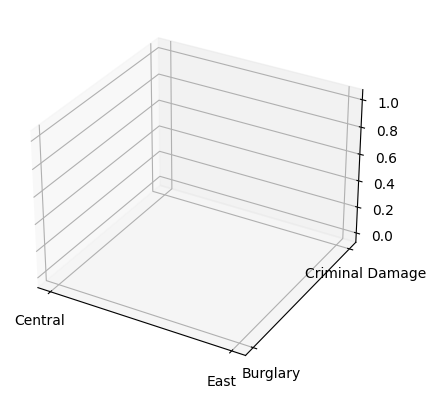

In [35]:
import matplotlib.pyplot as plt
tmp_crime = pd.merge(
    crime_dataset, census_dataset[['WardCode', 'NESW']])
crime_time = tmp_crime.drop(['WardCode'], axis=1)
crime_time = crime_time.groupby(['NESW', 'MajorCategory']).sum()
crime_time['totCrime'] = crime_time.sum(axis=1)
crime_time = crime_time['totCrime']
crime_time_ni = crime_time.reset_index()
# crime_time = crime_time_ni.pivot(
#     index='NESW', columns='MajorCategory', values='totCrime')
crime_time_ni
ax = plt.axes(projection="3d")
ax.scatter3D(x=crime_time_ni.NESW, y=crime_time_ni.MajorCategory,
             z=crime_time_ni.totCrime)
plt.show()


In [ ]:
crime_time = crime_dataset.drop(
    ['WardName', 'MajorCategory', 'MinorCategory', 'Borough'], axis=1)
crime_time.groupby('WardCode').sum()

columns = crime_time.columns.to_list()
columns.remove('WardCode')
years = []
months = []
for column in columns:
    years.append(column[2:6])
    months.append(column[6:])

year_month = pd.DataFrame({'Years': years, 'Months': months, 'date': columns})

crime_time = crime_time.transpose()
crime_time = crime_time.reset_index()
crime_time['index'].iloc[0] = 'date'
new_header = crime_time.iloc[0]
crime_time = crime_time[1:]
crime_time.columns = new_header
time_analysis = pd.merge(crime_time, year_month)


#### Check if there is a relation between the number of crimes and the months

Text(0, 0.5, 'number of crimes')

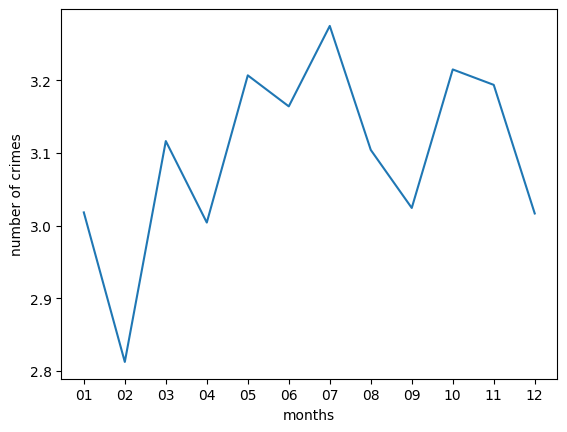

In [ ]:
import matplotlib.pyplot as plt
month_analysis = time_analysis.drop(['date', 'Years'], axis=1)
month_analysis = month_analysis.groupby('Months').mean()
month_analysis = month_analysis.mean(axis=1)

plt.plot(month_analysis)
plt.xlabel('months')
plt.ylabel('number of crimes')